<a href="https://colab.research.google.com/github/tusharmoon/ML_Projets/blob/main/Driver_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Set a random seed for reproducibility
np.random.seed(0)

# Define the number of years and months
num_years = 6
months_per_year = 12
total_months = num_years * months_per_year

# Generate time dimensions (dates)
dates = pd.date_range(start='2018-01-01', periods=total_months, freq='M')



# Generate synthetic data for each factor
supply_chain_efficiency = np.random.uniform(50, 90, total_months)
demand_forecasting_accuracy = np.random.uniform(60, 95, total_months)
seasonality = np.random.uniform(40, 95, total_months)
promotion = np.random.uniform(35, 96, total_months)
competitor_stock_levels = np.random.uniform(40, 95, total_months)

# Generate synthetic data for the product availability KPI with colinearity
product_availability = (
    0.36 * supply_chain_efficiency +
    0.3 * demand_forecasting_accuracy +
    0.1 * seasonality +
    0.05 * promotion -
    0.2 * competitor_stock_levels
)

# Create a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Year':dates.year,
    'Month':dates.month,
    'supply_chain_efficiency': supply_chain_efficiency,
    'demand_forecasting_accuracy': demand_forecasting_accuracy,
    'seasonality': seasonality,
    'promotion': promotion,
    'competitor_stock_levels': competitor_stock_levels,
    'product_availability': product_availability
})

#data.to_excel(r"Driver_Analysis.xlsx",index=False)
data

,Date,Year,Month,supply_chain_efficiency,demand_forecasting_accuracy,seasonality,promotion,competitor_stock_levels,product_availability
0,2018-01-31,2018,1,71.952540,94.186638,84.340669,54.521046,67.356525,51.847720
1,2018-02-28,2018,2,78.607575,81.169593,78.713872,58.391298,75.170988,48.406359
2,2018-03-31,2018,3,74.110535,85.874225,45.512479,70.887344,60.272153,48.483245
3,2018-04-30,2018,4,71.795327,61.371573,90.571544,85.693956,47.529515,48.093739
4,2018-05-31,2018,5,66.946192,69.898244,79.283271,73.367892,85.216475,39.623529
...,...,...,...,...,...,...,...,...,...
67,2023-08-31,2023,8,53.884051,75.099645,51.929334,35.807448,77.476588,33.416140
68,2023-09-30,2023,9,83.517796,91.379131,76.469301,56.181245,55.267785,56.882581
69,2023-10-31,2023,10,53.843936,72.864665,54.482731,44.036593,47.087331,39.475853
70,2023-11-30,2023,11,89.058379,75.255272,41.135805,94.891593,61.597162,51.176326


<ipython-input-2-33a52c7d3acd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


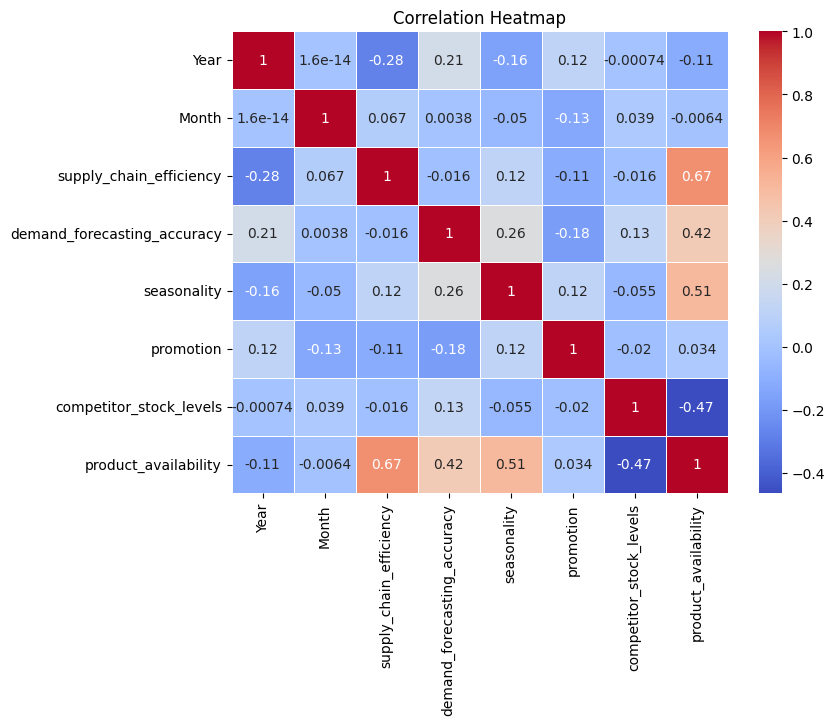

In [ ]:
correlation_matrix = data.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Define the function for driver analysis
def driver_analysis(df):
    # Define the dependent variable (KPI) and independent variables (factors)
    kpi = 'product_availability'
    factors = ['supply_chain_efficiency', 'demand_forecasting_accuracy', 'seasonality', 'promotion', 'competitor_stock_levels']

    X = df[factors]
    y = df[kpi]

    # Create a Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    lr_coefficients = dict(zip(factors, lr_model.coef_))

    # Create a Random Forest regression model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
    rf_model.fit(X, y)
    rf_feature_importances = dict(zip(factors, rf_model.feature_importances_))

    return lr_coefficients, rf_feature_importances, lr_model, rf_model

# Call the driver_analysis function with the generated data
lr_coefficients, rf_feature_importances, lr_model, rf_model = driver_analysis(data)

# Print the Linear Regression coefficients
print("Linear Regression Coefficients:")
print(lr_coefficients)

# Print the Linear Regression model
print("Linear Regression Model:",lr_model)

print("\n")

# Print the Random Forest feature importances
print("Random Forest Feature Importances:")
print(rf_feature_importances)

# Print the Random Forest model
print("Random Forest Model:",rf_model)

print("\n")
print("*********** Result's ***************")

# Define a dictionary with new factor values

new_factors = {
    'supply_chain_efficiency':71,
    'demand_forecasting_accuracy': 94,
    'seasonality': 84,
    'promotion':54,
    'competitor_stock_levels': 67
}

# Convert the dictionary to a DataFrame with a single row
new_data = pd.DataFrame([new_factors])

# Use the trained model for prediction
predicted_availability_LR = lr_model.predict(new_data)
predicted_availability_RF = rf_model.predict(new_data)

# Print the predicted product availability
print("Predicted Product Availability using Linear Regression :", predicted_availability_LR[0])
print("\n")
print("Predicted Product Availability using Random Forest Regressor:", predicted_availability_RF[0])


Linear Regression Coefficients:
{'supply_chain_efficiency': 0.35999999999999976, 'demand_forecasting_accuracy': 0.2999999999999999, 'seasonality': 0.10000000000000009, 'promotion': 0.05000000000000018, 'competitor_stock_levels': -0.20000000000000007}
Linear Regression Model: LinearRegression()


Random Forest Feature Importances:
{'supply_chain_efficiency': 0.5208638084213155, 'demand_forecasting_accuracy': 0.10717244833546438, 'seasonality': 0.14030030883741834, 'promotion': 0.038674956381207645, 'competitor_stock_levels': 0.19298847802459407}
Random Forest Model: RandomForestRegressor(random_state=0)


*********** Result's ***************
Predicted Product Availability using Linear Regression : 51.45999999999999


Predicted Product Availability using Random Forest Regressor: 48.102358761575424
